In [1]:
from unifloc.pvt.fluid_flow import FluidFlow
from unifloc.equipment.natural_separation import NaturalSeparation
from mech_marquez_corr import MechMarquezCorr
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
# Инициализация исходных данных класса FluidFlow
q_fluid = 50 / 86400
wct = 0
pvt_model_data = {'black_oil': {'gamma_gas': 0.7, 'gamma_wat': 1, 'gamma_oil': 0.8,
                                'rp': 50,
                                'oil_correlations':
                                 {'pb': 'Standing', 'rs': 'Standing',
                                  'rho': 'Standing','b': 'Standing',
                                  'mu': 'Beggs', 'compr': 'Vasquez'},
                    'gas_correlations': {'ppc': 'Standing', 'tpc': 'Standing',
                                         'z': 'Dranchuk', 'mu': 'Lee'},
                    'water_correlations': {'b': 'McCain', 'compr': 'Kriel',
                                           'rho': 'Standing', 'mu': 'McCain'},
                    'rsb': {'value': 50, 'p': 10000000, 't': 303.15},
                    'muob': {'value': 0.5, 'p': 10000000, 't': 303.15},
                    'bob': {'value': 1.5, 'p': 10000000, 't': 303.15},
                    'table_model_data': None, 'use_table_model': False}}

# Инициализация исходных данных метода расчета pvt-свойств флюидов
p = 4 * (10 ** 6)
t = 350

In [3]:
# Инициализация объекта pvt-модели
fluid_flow = FluidFlow(q_fluid, wct, pvt_model_data)

In [4]:
# Пересчет всех свойств для данного давления и температуры
fluid_flow.calc_flow(p, t)

In [5]:
h_mes_ = 1800

# Зависимость от q_fluid

In [6]:
q_fluid_list = tuple(np.linspace(50, 200, num=10, endpoint=True))
k_sep_nat_calc = NaturalSeparation(h_mes_)
e_marq_list = []
e_unifloc_list = []
for q_i in tqdm(q_fluid_list):
    fluid_flow_i = FluidFlow(q_i/86400, wct, pvt_model_data)
    fluid_flow_i.calc_flow(p, t)
    
    e_sep_marq = MechMarquezCorr.calc_k_sep(q_fluid=fluid_flow_i.ql,
                                            q_gas=fluid_flow_i.qg,
                                            dens_l=fluid_flow_i.rl,
                                            dens_g=fluid_flow_i.rg,
                                            sigma_l=fluid_flow_i.stlg,
                                            mu_l=fluid_flow_i.mul * 10**(-3),
                                            dens_mix=fluid_flow_i.rm,
                                            mu_mix=fluid_flow_i.mum * 10**(-3),
                                            d_tub=0.063,
                                            d_cas=0.130,
                                            h_p=0.063 + 10*10**(-3),
                                            ann_type='con',
                                            eccentricity=0.8,
                                            wct=wct,
                                            pvt_model_data=pvt_model_data,
                                            p=p,
                                            t=t)
    
    e_marq_list.append(e_sep_marq)
    
    k_sep_natural = k_sep_nat_calc.calc_separation(0.063, 0.130, fluid_flow_i.ql, fluid_flow_i.qg,
                                                   fluid_flow_i.stlg, fluid_flow_i.rl, fluid_flow_i.rg)
    
    e_unifloc_list.append(k_sep_natural)
    
#     print(f'e_sep_marq = {e_sep_marq}')
#     print(f'e_sep_unifloc = {k_sep_natural}\n')


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:49<00:00, 10.98s/it]


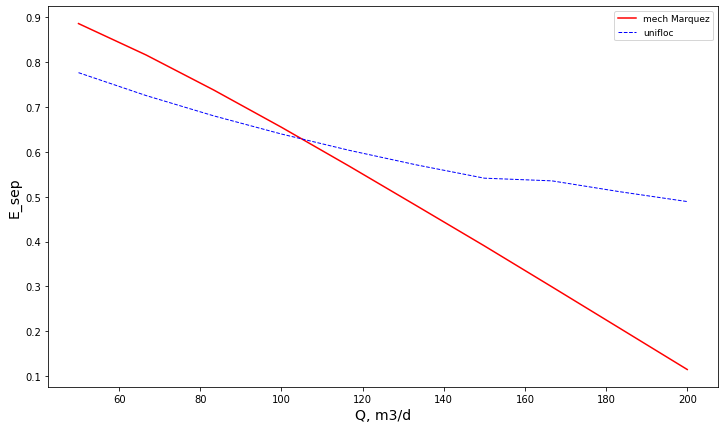

In [7]:
plt.figure(figsize=(12,7))

plt.plot(q_fluid_list, e_marq_list, 'r', lw=1.5)
plt.plot(q_fluid_list, e_unifloc_list, 'b--', lw=1)

   
plt.legend(['mech Marquez', 'unifloc'], fontsize=9)

plt.xlabel('Q, m3/d', fontsize=14)
plt.ylabel('E_sep', fontsize=14)

# plt.ylim([h_p, 0])
# plt.xlim([r_c, r_p])

# plt.xticks(np.linspace(r_c, r_p, num=10, endpoint=True))
# plt.yticks(np.linspace(h_p, 0, num=10, endpoint=True))

plt.show()

# Зависимость от $D_{cas}$

In [8]:
d_tub_list = tuple(np.linspace(0.100, 0.150, num=10, endpoint=True))
k_sep_nat_calc = NaturalSeparation(h_mes_)
e_marq_list1 = []
e_unifloc_list1 = []

fluid_flow_i = FluidFlow(100/86400, wct, pvt_model_data)
fluid_flow_i.calc_flow(p, t)
    
for d_i in tqdm(d_tub_list):
    
    
    e_sep_marq = MechMarquezCorr.calc_k_sep(q_fluid=fluid_flow_i.ql,
                                            q_gas=fluid_flow_i.qg,
                                            dens_l=fluid_flow_i.rl,
                                            dens_g=fluid_flow_i.rg,
                                            sigma_l=fluid_flow_i.stlg,
                                            mu_l=fluid_flow_i.mul * 10**(-3),
                                            dens_mix=fluid_flow_i.rm,
                                            mu_mix=fluid_flow_i.mum * 10**(-3),
                                            d_tub=0.063,
                                            d_cas=d_i,
                                            h_p=0.063 + 10*10**(-3),
                                            ann_type='con',
                                            eccentricity=0.8,
                                            wct=wct,
                                            pvt_model_data=pvt_model_data,
                                            p=p,
                                            t=t)
    
    e_marq_list1.append(e_sep_marq)
    
    k_sep_natural = k_sep_nat_calc.calc_separation(0.063, d_i, fluid_flow_i.ql, fluid_flow_i.qg,
                                                   fluid_flow_i.stlg, fluid_flow_i.rl, fluid_flow_i.rg)
    
    e_unifloc_list1.append(k_sep_natural)
    
#     print(f'e_sep_marq = {e_sep_marq}')
#     print(f'e_sep_unifloc = {k_sep_natural}\n')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:50<00:00, 11.05s/it]


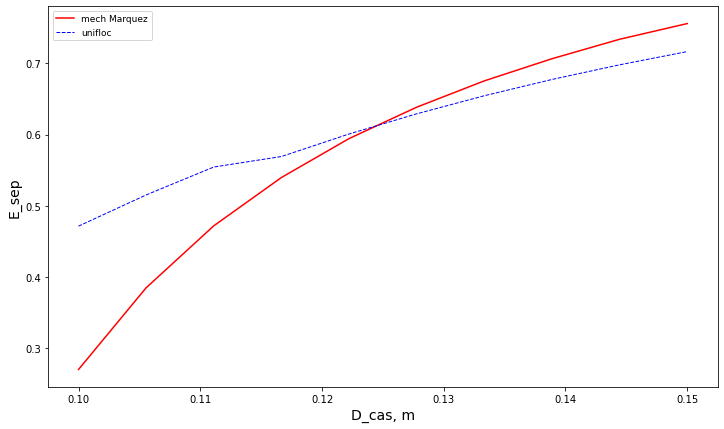

In [9]:
plt.figure(figsize=(12,7))

plt.plot(d_tub_list, e_marq_list1, 'r', lw=1.5)
plt.plot(d_tub_list, e_unifloc_list1, 'b--', lw=1)

   
plt.legend(['mech Marquez', 'unifloc'], fontsize=9)

plt.xlabel('D_cas, m', fontsize=14)
plt.ylabel('E_sep', fontsize=14)

# plt.ylim([h_p, 0])
# plt.xlim([r_c, r_p])

# plt.xticks(np.linspace(r_c, r_p, num=10, endpoint=True))
# plt.yticks(np.linspace(h_p, 0, num=10, endpoint=True))

plt.show()

# Зависимость от величины щели приема насоса $h_p$

In [10]:
h_p_list = tuple(np.linspace(0.063 + 5*10**(-3), 0.063 + 10*10**(-3), num=10, endpoint=True))
k_sep_nat_calc = NaturalSeparation(h_mes_)
e_marq_list2 = []
e_unifloc_list2 = []

fluid_flow_i = FluidFlow(100/86400, wct, pvt_model_data)
fluid_flow_i.calc_flow(p, t)
    
for h_p_i in tqdm(h_p_list):
    
    
    e_sep_marq = MechMarquezCorr.calc_k_sep(q_fluid=fluid_flow_i.ql,
                                            q_gas=fluid_flow_i.qg,
                                            dens_l=fluid_flow_i.rl,
                                            dens_g=fluid_flow_i.rg,
                                            sigma_l=fluid_flow_i.stlg,
                                            mu_l=fluid_flow_i.mul * 10**(-3),
                                            dens_mix=fluid_flow_i.rm,
                                            mu_mix=fluid_flow_i.mum * 10**(-3),
                                            d_tub=0.063,
                                            d_cas=0.130,
                                            h_p=h_p_i,
                                            ann_type='con',
                                            eccentricity=0.8,
                                            wct=wct,
                                            pvt_model_data=pvt_model_data,
                                            p=p,
                                            t=t)
    
    e_marq_list2.append(e_sep_marq)
    
    k_sep_natural = k_sep_nat_calc.calc_separation(0.063, 0.130, fluid_flow_i.ql, fluid_flow_i.qg,
                                                   fluid_flow_i.stlg, fluid_flow_i.rl, fluid_flow_i.rg)
    
    e_unifloc_list2.append(k_sep_natural)
    
#     print(f'e_sep_marq = {e_sep_marq}')
#     print(f'e_sep_unifloc = {k_sep_natural}\n')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:45<00:00, 10.55s/it]


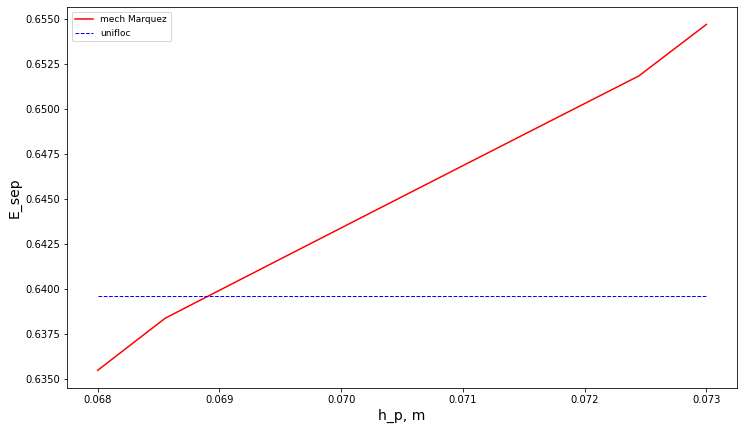

In [11]:
plt.figure(figsize=(12,7))

plt.plot(h_p_list, e_marq_list2, 'r', lw=1.5)
plt.plot(h_p_list, e_unifloc_list2, 'b--', lw=1)

   
plt.legend(['mech Marquez', 'unifloc'], fontsize=9)

plt.xlabel('h_p, m', fontsize=14)
plt.ylabel('E_sep', fontsize=14)

# plt.ylim([h_p, 0])
# plt.xlim([r_c, r_p])

# plt.xticks(np.linspace(r_c, r_p, num=10, endpoint=True))
# plt.yticks(np.linspace(h_p, 0, num=10, endpoint=True))

plt.show()